# Cold pool detection summary
This notebook illustrates some examples and results of the cold pool detection as well as the mask that is used in the detection algorithm to exclude the Alpes. 

## Module / libraries

In [3]:
import pandas as pd
from datetime import datetime, timedelta
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
from skimage.measure import  regionprops
from matplotlib.dates import DateFormatter

import scipy

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="Mean of empty slice") 

## Detektion

In [53]:
def vergleichs_plotba(uhr,zeit,var1,y,var2,var3,var4,var5,date):
    levs = np.array([0.01,0.1, 0.5, 1., 2.,4, 6., 10., 50.,100.])
    # Colorbar with NSW Precip colors
    nws_precip_colors = [
    #"#FFFFFF",  # 0.0 - 0.01 inches
    "#04e9e7",  # 0.01 - 0.10 inches
    "#019ff4",  # 0.10 - 0.25 inches
    "#0300f4",  # 0.25 - 0.50 inches
    #"#02fd02",  # 0.50 - 0.75 inches
    "#01c501",  # 0.75 - 1.00 inches
    "#008e00",  # 1.00 - 1.50 inches
    "#fdf802",  # 1.50 - 2.00 inches
    "#e5bc00",  # 2.00 - 2.50 inches
    "#fd9500",  # 2.50 - 3.00 inches
    "#fd0000",  # 3.00 - 4.00 inches
    "#d40000",  # 4.00 - 5.00 inches
    "#bc0000",  # 5.00 - 6.00 inches
    "#f800fd",  # 6.00 - 8.00 inches
    "#9854c6"   # 8.00 - 10.00 inches  
    ]
    precip_colormap = mpl.colors.ListedColormap(nws_precip_colors)
    
    kws = dict(cmap='viridis')
    cmap=plt.cm.viridis
    cmap.set_bad('white',1.)
    projection = ccrs.RotatedPole(
            pole_latitude=data.rotated_pole.grid_north_pole_latitude,
            pole_longitude=float(data.rotated_pole.grid_north_pole_longitude))

    fig=plt.figure(figsize=(24,18),facecolor='w', edgecolor='k')
    #fig.suptitle(zeit+'UTC')
    print(zeit+'UTC')
    
    ################
    ### Subplot1 ### ax1, cf1, cfx, var1, var2, y
    ################
    
    ax1 = plt.subplot(2, 2, 1, projection=projection)
    ax1.set_global()
    ax1.set_title('(a) labels',loc='left')
    ax1.coastlines(resolution='50m')
    ax1.add_feature(cf.BORDERS.with_scale('50m'))
    ax1.set_extent([3.6, 17.5, 45, 56])
    
    levels1 = np.arange(0,np.nanmax(var1)+1,1.)
    levels2 = np.arange(287,302,0.3)

    levels5 = np.array([0.1, 1.0])
    if y<2:
        cfx=ax1.contourf(data.rlon, data.rlat, var2,levels2,**kws)
        fig.colorbar(cfx,ax = ax1,shrink=0.9,label='$\\theta$ in K')
        print(j+shift,'no cold pool')
    else:
        cf1=ax1.contourf(data.rlon, data.rlat, var1,levels1,cmap=cmap)
        fig.colorbar(cf1,ax=ax1,aspect=20,shrink=0.9,label='CP-Index')
        
    ################
    ### Subplot2 ### ax2, cf2 , var2
    ################
    
    
    ax2 = plt.subplot(2, 2, 2, projection=projection)
    ax2.set_title('(b) $\\theta_{\\rho}$',loc='left')#'%s'%(var2.name))
    ax2.set_global()
    ax2.coastlines(resolution='50m')
    ax2.add_feature(cf.BORDERS.with_scale('50m'))
    ax2.set_extent([3.6, 17.5, 45, 56])
    
    levels2 = np.arange(287,302,0.3)
    cf2=ax2.contourf(data.rlon, data.rlat, var2,levels2,**kws)
    fig.colorbar(cf2,ax = ax2,shrink=0.9,label='$\\theta_{\\rho}$ in K')

    
    ################
    ### Subplot3 ### ax3, cf3, var3
    ################ 
        
    ax3 = plt.subplot(2, 2, 3, projection=projection)
    ax3.set_title('(c) rain field',loc='left')
    ax3.set_global()
    ax3.coastlines(resolution='50m')
    ax3.add_feature(cf.BORDERS.with_scale('50m'))
    ax3.set_extent([3.6, 17.5, 45, 56])

    levels3 = np.arange(0,(np.nanmax(var3)+1),1.)
    norm = mpl.colors.BoundaryNorm(levs, 10)
    cf3=ax3.contourf(data.rlon, data.rlat,var5,levs,norm=norm,cmap=precip_colormap)
    fig.colorbar(cf3,ax=ax3,aspect=20,shrink=0.9,label='mm/h')
        
        
    ################
    ### Subplot4 ### ax4, cf4, var4,
    ################
    
    ax4 = plt.subplot(2, 2, 4, projection=projection)
    ax4.set_title('(d) $\\theta_{\\rho,pert}$',loc='left')
    ax4.set_global()
    ax4.coastlines(resolution='50m')
    ax4.add_feature(cf.BORDERS.with_scale('50m'))
    ax4.set_extent([3.6, 17.5, 45, 56])
    
    levels4 = np.arange(-7.5,2.1,0.3)
    cf4=ax4.contourf(data.rlon, data.rlat, var4,levels4,cmap=cmap)
    fig.colorbar(cf4,ax = ax4,aspect=20,shrink=0.9,label='$\\theta_{\\rho,pert}$ in K')
    
    fig.tight_layout()
    ziel='/project/meteo-scratch/Christian.Sackrenz/cpp-new/'
    #fig.savefig(ziel+'Detektionsschema_ba_'+zeit+'UTC.png')
    #plt.close(fig)
    plt.show()

In [54]:
date='20160606'
ordner='/project/meteo-scratch/Christian.Sackrenz/cpp-new/'
grob='_pt_rho_pert_%s_lev_45_' %(date)
file='thres_pt_1.2_thres_rain_max_4.0_mm_h_filter_30_2_px_msize_24_allmod3box.nc'
data =xr.open_dataset(ordner+grob+file)

2016-06-06T15:00UTC


/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


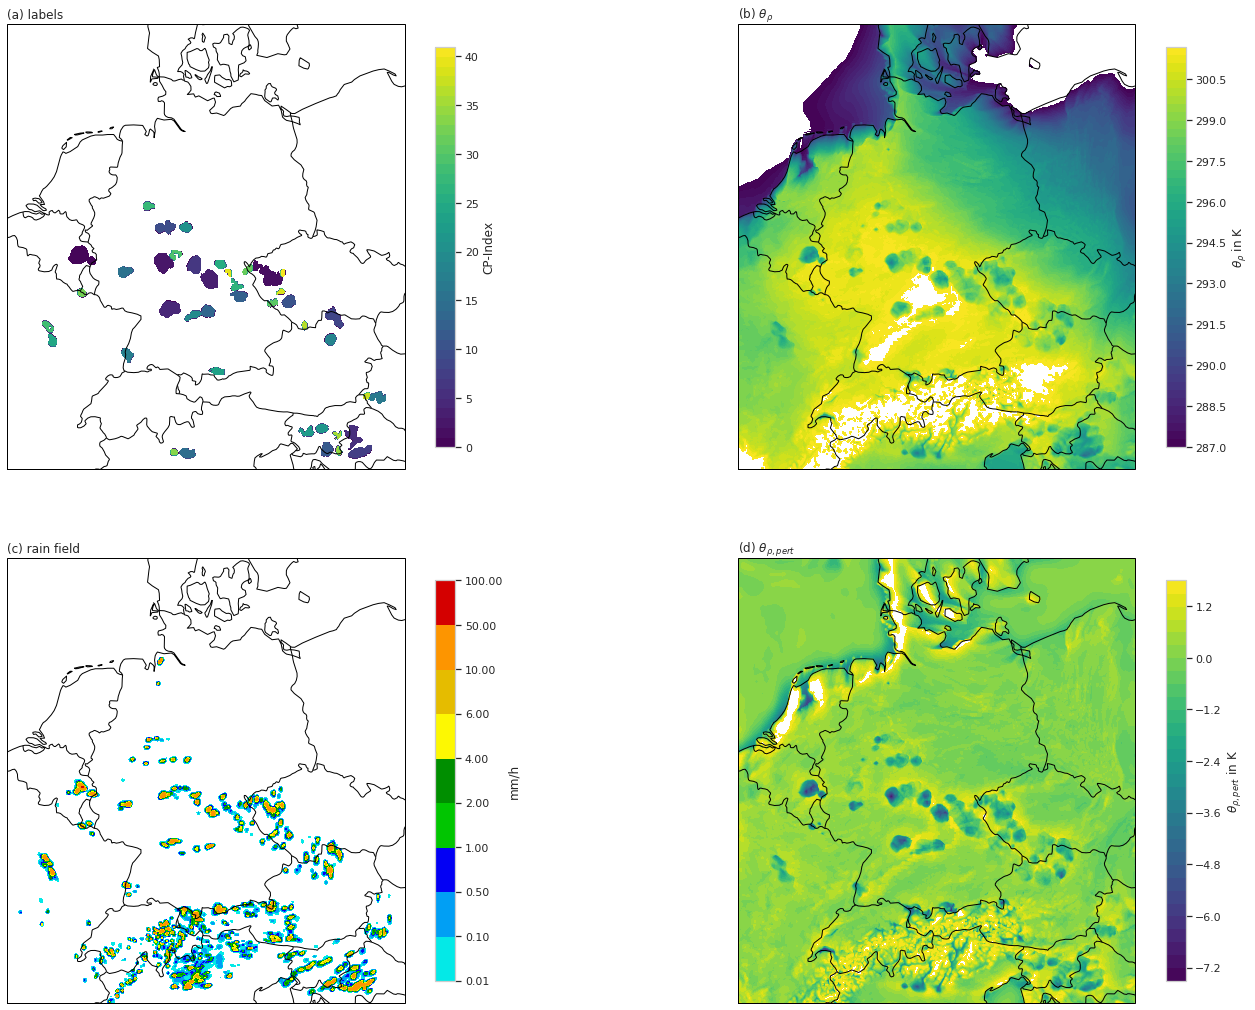

In [55]:
j=7
shift=8
uhr=j+shift
zeit=data.time[uhr].values
zeit=str(zeit).split(':00.0')[0]
var1=data.pt_rho_pert_labeled.isel(time=uhr).values
y=np.unique(data.pt_rho_pert_labeled.isel(time=uhr).values).size
np.place(var1[:,:],var1[:,:]==0,[-10])

var2=data.pt_rho.isel(time=uhr).values
var3=data.pt_rho_pert_labeled.isel(time=uhr).values
np.place(var3[:,:],var3[:,:]==0,[-10])
var4=data.pt_rho_pert.isel(time=uhr).values

var5=data.rain_gsp_rate.isel(time=uhr)
vergleichs_plotba(uhr,zeit,var1,y,var2,var3,var4,var5,date)

## Mask to exclude Alpes

In [56]:
outputgrob='/project/meteo-scratch/M.Hirt/Cold_pool_perturbations/cosmo_runs/'
output_dir=outputgrob+'%s00/cde_cpp2.17_tanh_a1.2_wmax0.6_kref38_theta1.5_sso50.0_tau120.0_dh500.0_h01500.0_turlen500_%s00/OUTPUT/' %(date,date)
filebasic='lfff0*0000c.nc_1h.nc'
ds =xr.open_mfdataset(output_dir+filebasic,combine='by_coords')

The detektion-area is optimize by adding boxes over the alps in the FR_LAND mask.
The masked designed on following parameter:

In [49]:
#Filter for alps
maskFRA=((ds.coords["time"] != 0)&(ds.coords["rlat"] > -5)& (ds.coords["rlat"] < -2.8)& (ds.coords["rlon"] > -2.9)& (ds.coords["rlon"] < -1.9))
maskCHITA = ((ds.coords["time"] != 0)&(ds.coords["rlat"] > -4.3)& (ds.coords["rlat"] < -2.45)& (ds.coords["rlon"] > -2.2)& (ds.coords["rlon"] < 1.5))
maskAUT = ((ds.coords["time"] != 0)&(ds.coords["rlat"] > -3.85)& (ds.coords["rlat"] < -2.2)& (ds.coords["rlon"] > 1.0)& (ds.coords["rlon"] < 2.7))
mask=maskFRA+maskCHITA+maskAUT
ds["FR_LAND"] = xr.where(mask, 0, ds["FR_LAND"])

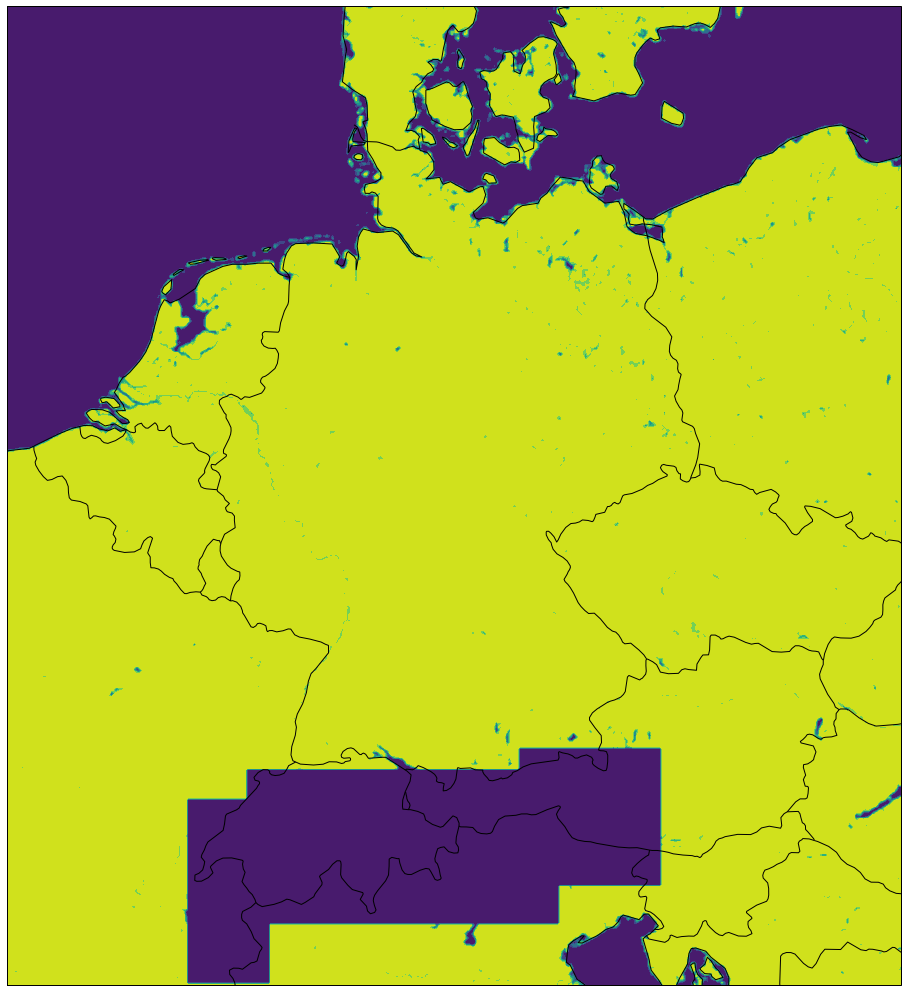

In [48]:
kws = dict(cmap='viridis')
cmap=plt.cm.viridis
cmap.set_bad('white',1.)
projection = ccrs.RotatedPole(
        pole_latitude=data.rotated_pole.grid_north_pole_latitude,
        pole_longitude=float(data.rotated_pole.grid_north_pole_longitude))
fig=plt.figure(figsize=(24,18),facecolor='w', edgecolor='k')
ax = plt.axes(projection=projection)
ax.contourf(ds.rlon, ds.rlat,ds.FR_LAND[0,:],cmap=cmap)
ax.coastlines(resolution='50m')
ax.add_feature(cf.BORDERS.with_scale('50m'))


## Plots

In [15]:
ziel='home/c/Christian.Sackrenz/BA-Cold-Pools/vsc/'
ziel2='/project/meteo-scratch/Christian.Sackrenz/cpp-new/'

f1=0
farbliste=['orange','blue','green','red','cyan','purple']
f=2
if f==1:
    datenlauf='2moment'
    f=1
    liste=['0529-0607_referenz','0529-0607_2moment','0529-0602_referenz','0529-0602_2moment','0603-0607_referenz','0603-0607_2moment','0529-0607_referenz','0529-0607_2moment']
    partner='referenz_2moment'
elif f==2:
    datenlauf='cpp1.2'
    f=2
    liste=['0529-0607_referenz','0529-0607_cpp1.2','0529-0602_referenz','0529-0602_cpp1.2','0603-0607_referenz','0603-0607_cpp1.2','0529-0607_referenz','0529-0607_cpp1.2']
    partner='referenz_cpp1.2'#2.11a2kref38tau600'
    laufa='1.2'
else: print('wrong setup?')

In [16]:
ordner='/project/meteo-scratch/Christian.Sackrenz/cpp-new/'
files  = 'zwischendaten/*_daily_daten_median_only_ref.nc'
files2  = 'zwischendaten/*_daily_daten_median_only_cpp_a%s.nc' %(laufa)

#''files2 = '*_daily_daten_median_only_'
#daten
daten = xr.open_mfdataset(ordner+files,combine='by_coords')
#daten 2moment/cpp

#''daten2 = xr.open_mfdataset(ordner+'*_daily_daten_median_only_2moment_ba.nc',combine='by_coords')
daten2=xr.open_mfdataset(ordner+files2,combine='by_coords')

#Analysedaten
file='_pt_rho_pert_*_lev_45_thres_pt_1.2_thres_rain_max_4.0_mm_h_filter_30_2_px_msize_24_allmod3box.nc'
file2='cpp_a%s_pt_rho_pert_*_lev_45_thres_pt_1.2_thres_rain_max_4.0_mm_h_filter_30_2_px_msize_24_allmod3box.nc' %(laufa)
#''file2='_pt_rho_pert_*_lev_45_thres_pt_1.2_thres_rain_max_4.0_mm_h_filter_30_2_px_msize_24_allmod3box_neu.nc' #%(date)

data =xr.open_mfdataset(ordner+file,concat_dim='time',combine='by_coords')
data2=xr.open_mfdataset(ordner+file2,concat_dim='time',combine='by_coords')


### function for medians

In [28]:
def multi_median_red(var,data,data2):
    il=[]
    zeitl=[]
    x1l =[]
    x2l =[]
    x1al=[]
    x2al=[]
    x1bl=[]
    x2bl=[]

    for i in np.unique(data.indexh.values):
        if i <8: continue
        if i >22: continue
        zeit=str(i)+':00'
        zeitl.append(zeit)
        il.append(i)
        num=np.nanmedian(data[var].values[data.indexh.values==i])
        x1l.append(num)
        num2=np.nanmedian(data2[var].values[data2.indexh.values==i])
        x2l.append(num2)
        ##Periode 1
        num1a=np.nanmedian(data[var].values[data.indexh.values==i][0:4])
        x1al.append(num1a)
        num2a=np.nanmedian(data2[var].values[data2.indexh.values==i][0:4])
        x2al.append(num2a)
        ##Periode 2
        num1b=np.nanmedian(data[var].values[data.indexh.values==i][5:9])
        x1bl.append(num1b)
        num2b=np.nanmedian(data2[var].values[data2.indexh.values==i][5:9])
        x2bl.append(num2b)
    return il,x1l,x2l,x1al,x2al,x1bl,x2bl

In [17]:
def multi_median(var,data,data2):
    il=[]
    zeitl=[]
    x1l =[]
    x2l =[]
    x1al=[]
    x2al=[]
    x1bl=[]
    x2bl=[]

    for i in np.unique(data.indexh.values):
        zeit=str(i)+':00'
        zeitl.append(zeit)
        il.append(i)
        ##Periode total
        num = np.nanmedian(data[var].values[data.indexh.values==i])
        x1l.append(num)
        num2=np.nanmedian(data2[var].values[data2.indexh.values==i])
        x2l.append(num2)
        ##Periode 1
        num1a= np.nanmedian(data[var].values[data.indexh.values==i][0:4])
        x1al.append(num1a)
        num2a=np.nanmedian(data2[var].values[data2.indexh.values==i][0:4])
        x2al.append(num2a)
        ##Periode 2
        num1b= np.nanmedian(data[var].values[data.indexh.values==i][5:9])
        x1bl.append(num1b)
        num2b=np.nanmedian(data2[var].values[data2.indexh.values==i][5:9])
        x2bl.append(num2b)
    return il,x1l,x2l,x1al,x2al,x1bl,x2bl

In [18]:
def multi_box_red(var,data,data2,f1,f):
    intliste=['0529-0607','0529-0602','0603-0607']
    farblistebox=[farbliste[f1],farbliste[f]]
    il=[]
    zeitl=[]
    x1l =[]
    x2l =[]
    x1al=[]
    x2al=[]
    x1bl=[]
    x2bl=[]

    for i in np.unique(data.indexh.values):
        if i <8: continue
        if i >22: continue
        zeit=str(i)+':00'
        zeitl.append(zeit)
        il.append(i)
        num=np.array(data[var].values[data.indexh.values==i])
        x1l.append(num)
        num2=np.array(data2[var].values[data2.indexh.values==i])
        x2l.append(num2)
        ##Periode 1
        num1a=np.array(data[var].values[data.indexh.values==i][0:4])
        x1al.append(num1a)
        num2a=np.array(data2[var].values[data2.indexh.values==i][0:4])
        x2al.append(num2a)
        ##Periode 2
        num1b=np.array(data[var].values[data.indexh.values==i][5:9])
        x1bl.append(num1b)
        num2b=np.array(data2[var].values[data2.indexh.values==i][5:9])
        x2bl.append(num2b)

    x1l=np.concatenate(x1l)    
    x2l=np.concatenate(x2l)
    x1al=np.concatenate(x1al)    
    x2al=np.concatenate(x2al)
    x1bl=np.concatenate(x1bl)    
    x2bl=np.concatenate(x2bl)
    
    xx=[partner.split('_')[0]]*len(x1l)
    h1=[intliste[0]]*len(x1l)
    xxa=[partner.split('_')[0]]*len(x1al)
    h1a=[intliste[1]]*len(x1al)
    xxb=[partner.split('_')[0]]*len(x1bl)
    h1b=[intliste[2]]*len(x1bl)
    xx2=[partner.split('_')[1]]*len(x2l)
    h2=[intliste[0]]*len(x2l)
    xx2a=[partner.split('_')[1]]*len(x2al)
    h2a=[intliste[1]]*len(x2al)
    xx2b=[partner.split('_')[1]]*len(x2bl)
    h2b=[intliste[2]]*len(x2bl)
    
    d={'Modell':np.concatenate((xx,xxa,xxb,xx2,xx2a,xx2b)),'yl':np.concatenate((x1l,x1al,x1bl,x2l,x2al,x2bl)),'interval':np.concatenate((h1,h1a,h1b,h2,h2a,h2b))}
    df=pd.DataFrame(data=d)
    return df,farblistebox

/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-Na

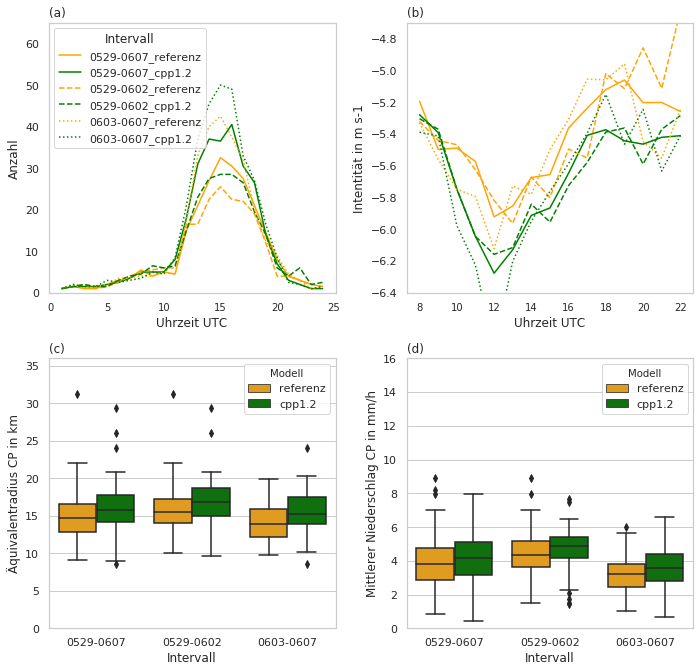

In [29]:
var1='n_clusters'
var2='intensity_median'#'precip_mean'#
var3='r_equ_mean'
var4='precip_mean'
il0,x1l, x2l, x1al, x2al, x1bl, x2bl = multi_median(var1,data,data2)#,x1cl,x2cl
il, y1l, y2l, y1al, y2al, y1bl, y2bl = multi_median_red(var2,data,data2)#,y1cl,y2cl
df3,farblistebox3= multi_box_red(var3,data,data2,f1,f)
df4,farblistebox4= multi_box_red(var4,data,data2,f1,f)

#medplot Flüsse
fig=plt.figure(figsize=(10, 9.5),facecolor='w', edgecolor='k')

##############
## subplot1 ##
##############
plt.subplot(2, 2, 1)
plt.plot(il0,x1l, label=liste[0],color=farbliste[f1])
plt.plot(il0,x2l, label=liste[1],color=farbliste[f])
plt.plot(il0,x1al,label=liste[2],color=farbliste[f1],linestyle='dashed')
plt.plot(il0,x2al,label=liste[3],color=farbliste[f], linestyle='dashed')
plt.plot(il0,x1bl,label=liste[4],color=farbliste[f1],linestyle='dotted')
plt.plot(il0,x2bl,label=liste[5],color=farbliste[f], linestyle='dotted')

#plt.legend(title='interval',loc='upper left')
titel='(a) '#+var1
plt.title(titel,loc='left')
plt.grid()
plt.xticks(size=10)
plt.xlabel('Uhrzeit UTC')
plt.ylim(0,65.)
plt.ylabel('numbers')
plt.legend(title='interval',loc='upper left')
##############
## subplot2 ##
##############
plt.subplot(2, 2, 2)
plt.plot(il,y1l, label=liste[0],color=farbliste[f1])
plt.plot(il,y2l, label=liste[1],color=farbliste[f])
plt.plot(il,y1al,label=liste[2],color=farbliste[f1],linestyle='dashed')
plt.plot(il,y2al,label=liste[3],color=farbliste[f], linestyle='dashed')
plt.plot(il,y1bl,label=liste[4],color=farbliste[f1],linestyle='dotted')
plt.plot(il,y2bl,label=liste[5],color=farbliste[f], linestyle='dotted')

#plt.legend(title='interval',loc='upper left')
titel='(b) '
plt.title(titel,loc='left')
plt.grid()
plt.xticks(size=10)
plt.xlabel('Uhrzeit UTC')
plt.ylabel('intensity in m s-1')
plt.ylim(-6.4,-4.7)
##############
## subplot3 ##
##############
plt.subplot(2,2,3)

titel='(c) '#+var3

sns.set(style="whitegrid")
sns.boxplot(x='interval',y='yl',hue='Modell',data=df3,palette=farblistebox3)

plt.ylabel('equivalent radius CP in '+data[var3].units)
plt.ylim(0,36)
plt.xlabel('interval')
plt.title(titel,loc='left')
#plt.legend(loc='upper right')

##############
## subplot4 ##
##############
plt.subplot(2, 2, 4)

titel='(d) '

#plt.ylim(0.8,6.)
sns.set(style="whitegrid")
sns.boxplot(x='interval',y='yl',hue='Modell',data=df4,palette=farblistebox4)
plt.ylabel('medium precipitation CP in '+data[var4].units)
plt.ylim(0,16)
plt.xlabel('interval')
plt.title(titel,loc='left')

plt.tight_layout()
#fig.savefig(ziel2+'aa_vergleich_'+partner+'.png')
plt.show()
